# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: **Laurensia Vira Farindra**
- Email: **laurensiavira@gmail.com**
- Id Dicoding: **lauvira**

## Menentukan Pertanyaan Bisnis

Berikut pertanyaan bisnis yang akan dicari jawabannya:

1) Bagaimana perkembangan performa penjualan di platform e-commerce dari waktu ke waktu?

2) Pada wilayah mana saja pelanggan paling banyak berada?

## Menyiapkan Semua Library yang Dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
!pip install unidecode
import unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 15.6 MB/s eta 0:00:00


## Data Wrangling

### Gathering Data

Pertama-tama, akan dilakukan import data lalu penggabungan seluruh data.

Penggunaan satu file data yang mencakup seluruh data akan mempermudah dalam melakukan proses selanjutnya.

In [2]:
customers = pd.read_csv('customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation = pd.read_csv('geolocation_dataset.csv')
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items = pd.read_csv('order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_pay = pd.read_csv('order_payments_dataset.csv')
order_pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_rev = pd.read_csv('order_reviews_dataset.csv')
order_rev.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders = pd.read_csv('orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_cat = pd.read_csv('product_category_name_translation.csv')
product_cat.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products = pd.read_csv('products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers = pd.read_csv('sellers_dataset.csv')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

Tahap *pre-processing* selanjutnya adalah pengecekan adanya data *null* dan data duplikat.

In [11]:
print('\nData null customers:\n', customers.isnull().sum())
print('\nData null geolocation:\n', geolocation.isnull().sum())
print('\nData null order items:\n', order_items.isnull().sum())
print('\nData null order payments:\n', order_pay.isnull().sum())
print('\nData null order reviews:\n', order_rev.isnull().sum())
print('\nData null orders:\n', orders.isnull().sum())
print('\nData null product category:\n', product_cat.isnull().sum())
print('\nData null products:\n', products.isnull().sum())
print('\nData null sellers:\n', sellers.isnull().sum())


Data null customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Data null geolocation:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Data null order items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Data null order payments:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Data null order reviews:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
re

In [12]:
print('Data duplikat customers:', customers.duplicated().sum())
print('Data duplikat geolocation:', geolocation.duplicated().sum())
print('Data duplikat order items:', order_items.duplicated().sum())
print('Data duplikat order payments:', order_pay.duplicated().sum())
print('Data duplikat order reviews:', order_rev.duplicated().sum())
print('Data duplikat orders:', orders.duplicated().sum())
print('Data duplikat product category:', product_cat.duplicated().sum())
print('Data duplikat products:', products.duplicated().sum())
print('Data duplikat sellers:', sellers.duplicated().sum())

Data duplikat customers: 0
Data duplikat geolocation: 261831
Data duplikat order items: 0
Data duplikat order payments: 0
Data duplikat order reviews: 0
Data duplikat orders: 0
Data duplikat product category: 0
Data duplikat products: 0
Data duplikat sellers: 0


Berdasarkan proses pengecekan di atas, dapat dilihat bahwa terdapat data *null* atau kekosongan data pada:
1. Data `order_reviews` kolom *title* dan *message*.
2. Data `orders` kolom *order_approved_at*, *order_delivered_carrier_date*, *order_delivered_customer_date*.
3. Data `products` kolom *product_category_name*, *product_name_lenght*, *product_description_lenght*, dan *product_photos_qty*.

Sedangkan, hanya terdapat duplikasi data pada `geolocation`.

### Cleaning Data

Proses *cleaning data* yang dilakukan adalah pengisian kolom yang memiliki data *null* pada `order_reviews` serta *dropping* pada `orders`. Tidak dilakukan drop data duplikat karena jika ditelaah kembali, value pada data `geolocation` memang memungkinkan untuk berduplikasi (value SP/Sao Paulo).

In [13]:
#Mengidentifikasi letak null pada data
order_rev[order_rev.review_comment_title.isna()]


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [14]:
#Mengidentifikasi letak null pada data
order_rev[order_rev.review_comment_message.isna()]


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [15]:
#Mengisi sel kosong dengan No Comment, dengan asumsi bahwa customer tidak melakuan review.
#(Terlihat pula dari value order_status yang canceled/dibatalkan)
order_rev.fillna(value="No Comment", inplace=True)


In [16]:
#Mengecek kembali apakah seluruh kolom telah terisi
print('\nData null order reviews:\n', order_rev.isnull().sum())


Data null order reviews:
 review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


In [17]:
#Mengidentifikasi letak null pada data
orders[orders.order_approved_at.isna()]


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [18]:
orders.dropna(axis=0, inplace=True)

In [19]:
#Mengecek kembali apakah seluruh kolom telah terisi
print('\nData null orders:\n', orders.isnull().sum())


Data null orders:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [20]:
orders.info()


<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


Diperkirakan bahwa sisa data *non-null* cukup untuk melakukan analisis selanjutnya.

## Exploratory Data Analysis (EDA)

### Explore **customers** dan **orders**

Akan di-*explore* persebaran geografis customer, preferensi tipe pembayaran, durasi pengiriman, serta status order.

In [21]:
#Mengecek apakah customer yang dianalisis seluruhnya unik.
#Jika True, maka diasumsikan seluruh customer adalah orang yang berbeda.
customers.customer_id.is_unique

True

In [22]:
#Mengetahui distribusi customers berdasarkan kotanya serta mengurutkan dari paling banyak.
customers.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


Customer terbanyak berada di kota Sao Paulo.

In [23]:
#Mengetahui distribusi customers berdasarkan negara bagian.
customers.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)


,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


Customer terbanyak terdapat pada negara bagian Sao Paulo.

In [24]:
#Mengetahui tipe pembayaran untuk pemesanan yang dilakukan.
order_pay.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)


,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


Tipe pembayaran yang menjadi favorit customer adalah dengan menggunakan kartu kredit.

In [25]:
#Mengubah format value menjadi datetime untuk mempermudah analisis
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"])
orders["order_delivered_carrier_date"] = pd.to_datetime(orders["order_delivered_carrier_date"])

#Menghitung selisih waktu pengiriman untuk setiap pesanan dalam satuan hari.
#Memasukkan hasil selisih tersebut ke dalam kolom baru "delivery_duration"
delivery_duration = orders["order_delivered_customer_date"]-orders["order_delivered_carrier_date"]
delivery_duration = delivery_duration.apply(lambda x: x.total_seconds()) #Mengubah ke satuan detik
orders["delivery_duration"] = round(delivery_duration/86400) #Mengubah ke satuan hari (dibulatkan)

In [26]:
orders.sample(10)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration
65161,e747b099854432937d27178c640102bf,15cd6d28330a079fcdcd23372d2930c6,delivered,2017-09-27 09:20:53,2017-09-28 03:34:20,2017-09-28 18:25:05,2017-10-03 21:29:01,2017-10-13 00:00:00,5.0
21435,3f41f3048b0987af5338a7f006741d2a,bb4f1c5265a284f27dd8e6568369eb96,delivered,2017-10-07 11:13:27,2017-10-07 11:28:22,2017-10-13 16:38:08,2017-10-16 21:56:39,2017-10-25 00:00:00,3.0
53070,5d0c01136dc9fc77030a514d40b3d37b,dd45b720dccd7bfde7eecaf8974ef691,delivered,2017-08-11 00:34:10,2017-08-11 00:45:14,2017-08-14 14:58:01,2017-08-19 13:35:18,2017-08-31 00:00:00,5.0
15752,501c116653eaf88cfccc776f8066c13f,68e2315bb68097a47af6f93db20473bc,delivered,2018-06-25 06:57:33,2018-06-25 07:17:37,2018-06-25 13:43:00,2018-06-27 21:04:59,2018-07-16 00:00:00,2.0
23721,970f01d4d6e42b5dbaaf975d2d45f913,746cb47767f7817cb0d5347862cecc08,delivered,2018-02-21 10:21:33,2018-02-21 12:05:35,2018-02-22 18:47:10,2018-02-28 19:22:42,2018-03-16 00:00:00,6.0
90974,d1e7343d9fea35ce6330478c84f0fb7f,38d582cf25bb1bc7d6f9f494dc2c260e,delivered,2018-07-25 18:18:42,2018-07-26 13:15:16,2018-07-27 10:55:00,2018-08-02 16:54:48,2018-08-09 00:00:00,6.0
75667,1420860371690847f7c995bcc5a44635,99974447c69793d64b279a9d29910dac,delivered,2017-05-15 19:58:44,2017-05-15 20:10:21,2017-05-16 09:44:19,2017-05-18 11:06:46,2017-05-30 00:00:00,2.0
84998,f859266ccfc29caf67429ae86f081f7a,4ec889f3d9cd212d69b57bf84fe19f61,delivered,2018-06-03 08:25:31,2018-06-03 08:50:07,2018-06-04 15:30:00,2018-06-11 23:41:53,2018-07-17 00:00:00,7.0
75731,1349d7f4ec671ded42f2360828965692,a9568489e5db4fb0153e27a71f4bc3f5,delivered,2018-07-18 07:41:58,2018-07-18 07:55:15,2018-07-18 13:43:00,2018-07-23 21:39:38,2018-08-02 00:00:00,5.0
74906,c991b8532e7abe41bcfae9b0ae4e8f45,6a2b9e1cf75c8dc7507792227a5d0ee8,delivered,2017-09-16 17:04:01,2017-09-16 17:24:22,2017-09-18 20:22:54,2017-09-22 21:22:14,2017-10-05 00:00:00,4.0


<Axes: >

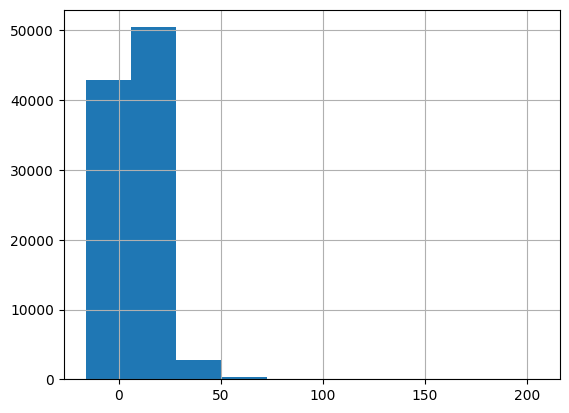

In [27]:
orders.delivery_duration.hist()


Berikut grafik dari durasi pengiriman barang pada *e-commerce*.

**Merge customers & orders**

In [28]:
#Untuk analisis berikutnya, data customers dan orders perlu digabungkan terlebih dahulu.
cust_and_orders = pd.merge(
    left=customers,
    right=orders,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
cust_and_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,10.0


In [29]:
cust_and_orders.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

,order_id
order_status,
delivered,96455
canceled,6


Pada dataset ini, sebagian besar order telah memiliki status *delivered* atau telah dikirim. Sisanya, terdapat order yang masih dalam proses *approval* hingga pengiriman. Ada pula beberapa order yang dibatalkan.  

In [31]:
cust_and_orders.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False)

,order_id
customer_city,
sao paulo,15044
rio de janeiro,6603
belo horizonte,2697
brasilia,2071
curitiba,1489
...,...
santo antonio de goias,0
baguari,0
alto bela vista,0


Terlihat bahwa hasilnya sama seperti saat kolom ***customer_id*** yang digunakan.

In [32]:
cust_and_orders.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

,order_id
customer_state,
SP,40489
RJ,12351
MG,11352
RS,5342
PR,4923
SC,3547
BA,3256
DF,2080
ES,1995


Terlihat bahwa hasilnya sama seperti saat kolom ***customer_id*** yang digunakan.

**Merge order_pay & order_rev**

In [33]:
#Untuk analisis berikutnya, data order_pay dan order_rev perlu digabungkan terlebih dahulu.
order_payrev = pd.merge(
    left=order_pay,
    right=order_rev,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_payrev.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,No Comment,No Comment,2018-06-30 00:00:00,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,No Comment,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,No Comment,No Comment,2017-12-21 00:00:00,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,No Comment,No Comment,2017-12-21 00:00:00,2017-12-22 01:10:39


In [34]:
#Mengetahui urutan besaran pembayaran beserta keterangan kolom lain secara lengkap.
order_payrev.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,No Comment,"Peço por favor verificar a entrega do pedido, ...",2017-10-18 00:00:00,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27 00:00:00,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,No Comment,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04 00:00:00,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaN,NaN
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,No Comment,No Comment,2017-06-06 00:00:00,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,No Comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21 00:00:00,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17 00:00:00,2018-08-18 15:32:40
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,No Comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21 00:00:00,2017-05-24 16:21:27
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,Péssima meu produtdefeito,No Comment,2018-08-24 00:00:00,2018-08-25 02:24:54


In [35]:
#Mengetahui besaran pembayaran paling kecil dan paling besar pada setiap tipe pembayaran.
order_payrev.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

**Merge cust_orders_df & order_payrev**

In [36]:
#mendapatkan gabungan data yang berkaitan dengan customers dan orders
all_customers_info = pd.merge(
    left=cust_and_orders,
    right=order_payrev,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_customers_info.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Comment,No Comment,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Comment,No Comment,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,No Comment,No Comment,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,No Comment,No Comment,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52


### Explore **order_items** dan **sellers**

In [37]:
item_seller = pd.merge(
    left=order_items,
    right=sellers,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [38]:
item_seller.groupby(by="seller_city").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
seller_city,
sao paulo,24588
ibitinga,6565
curitiba,2722
santo andre,2711
belo horizonte,2414
rio de janeiro,2193
guarulhos,2071
ribeirao preto,2019
sao jose do rio preto,1973


Terlihat bahwa order paling banyak dilakukan pada seller atau penjual yang berada di kota Sao Paulo.

In [39]:
item_seller.groupby(by="seller_city").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
seller_city,
sao paulo,7907
ibitinga,2268
curitiba,1139
rio de janeiro,874
belo horizonte,748
ribeirao preto,675
guarulhos,596
santo andre,493
praia grande,481


Berikut persebaran jumlah produk menurut kota. Terdapat perbedaan urutan kota jika dibandingkan dengan yang menggunakan *order_id*.

### Explore **products**

In [40]:
product_info = pd.merge(
    left=products,
    right=product_cat,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_info.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [41]:
product_info.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
auto,1900
computers_accessories,1639
toys,1411
watches_gifts,1329


Terlihat kategori produk yang paling banyak dibeli. Dalam kasus ini, kategori produk *bed_bath_table* (kasur, peralatan mandi, meja) adalah yang tertinggi.

**Merge item_seller & product_info**

In [42]:
all_product_info = pd.merge(
    left=product_info,
    right=item_seller,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
all_product_info.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [43]:
#Mengurutkan harga produk dari yang tertinggi sekaligus menampilkan seluruh kolom.
all_product_info.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55911,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,11,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


In [44]:
#Mengetahui harga produk terendah dan tertinggi pada masing-masing kategori produk.
all_product_info.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

### Explore **geolocation**

In [45]:
#Mengubah value pada geolocation_city dengan menghilangkan spasi, mengubah dalam
#bentuk lowercase, serta menghapus special characters.
def edit_string(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

In [46]:
geolocation['geolocation_city'] = geolocation['geolocation_city'].apply(edit_string)

In [47]:
geolocation.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

,0
geolocation_zip_code_prefix,
24220,1146
24230,1102
38400,965
35500,907
11680,879
...,...
20056,1
76370,1
63012,1


In [48]:
#Menunjukkan baris yang memiliki zip code prefix tertentu,
#misalnya 24230 (bisa diubah).
geolocation[geolocation['geolocation_zip_code_prefix'] == 24230].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470806,24230,-22.911270,-43.105151,niteroi,RJ
470807,24230,-22.905032,-43.114682,niteroi,RJ
470810,24230,-22.909753,-43.101880,niteroi,RJ
470816,24230,-22.908945,-43.108600,niteroi,RJ
470817,24230,-22.906274,-43.103573,niteroi,RJ


### Explore **All Data**

**Merge all data**

In [49]:
all_data = pd.merge(
    left= all_customers_info,
    right= all_product_info,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [50]:
#Mengetahui total jumlah harga dan jumlah ongkos kirim yang dibeli, dan disesuaikan
#dengan kota customer dan kategori produk. (Preferensi pembelian berdasarkan kota)
all_data.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[24891 rows x 2 columns]

Dari hasil tersebut, kita ambil contoh untuk customer dari abadia dos dourados. Di kota tersebut, customer membeli barang dengan kategori *buku_general_interest*, *cool_stuff*, dan *sports_leisure* dengan total harga produk dan ongkos kirim tertera.

In [51]:
all_data.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_state product_category_name_english                        
AC             auto                            606.97         146.42
               baby                            697.84         174.13
               bed_bath_table                  567.70         157.51
               books_general_interest          633.80         123.71
               christmas_supplies               69.90          60.95
...                                               ...            ...
TO             sports_leisure                 5533.32        1393.53
               stationery                      276.80          73.80
               telephony                      1268.12         627.34
               toys                           1864.15         423.96
               watches_gifts                  4920.89         921.06

[1351 rows x 2 columns]

Dilakukan hal yang mirip dengan sebelumnya, namun berdasarkan customer di negara bagian.

In [52]:
#Mengetahui urutan total order serta total pembayaran yang dilakukan customer di tiap negara bagian.
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,40489,7454745.74
RJ,12351,2699684.00
MG,11352,2290209.77
RS,5342,1117696.39
PR,4923,1036003.69
BA,3256,775836.28
SC,3547,769388.01
GO,1957,497367.84
DF,2080,424872.44


In [53]:
#Mengetahui score review terendah dan tertinggi yang didapatkan suatu kategori poduk.
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         177          1.0  5.0
air_conditioning                   246          1.0  5.0
art                                195          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              348          1.0  5.0
...                                ...          ...  ...
stationery                        2264          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4092          1.0  5.0
toys                              3804          1.0  5.0
watches_gifts                     5493          1.0  5.0

[71 rows x 3 columns]

Terlihat bahwa sebagian skor terendah adalah 1 dan skor tertinggi adalah 5. Dapat diperkirakan adanya keberagaman dalam *review*, karena range skor-nya juga 1 sampai 5.

### Convert all_data to .csv

Setelah semua data digabung, akhirnya disimpan ke dalam format .csv untuk dapat digunakan pada analisis selanjutnya.

In [54]:
all_data.to_csv('/content/all_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana perkembangan performa penjualan di platform *e-commerce* dari waktu ke waktu?

In [55]:
all_data_df = pd.read_csv('all_data.csv')
all_data_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [56]:
#Mengubah value menjadi datetime untuk analisis selanjutnya
all_data_df["order_approved_at"] = pd.to_datetime(all_data_df["order_approved_at"])

#Mengelompokkan pesanan berdasarkan bulan persetujuan pesanan serta
#menghitung jumlah pesanan unik dalam setiap bulannya.
monthly_df = all_data_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
})

monthly_df.index = monthly_df.index.strftime('%B') #Mengubah format order_approved_at menjadi Tahun-Bulan
monthly_df = monthly_df.reset_index() #Mengubah menjadi kolom data biasa
monthly_df.sample(15)

<ipython-input-56-5750533bd944>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = all_data_df.resample(rule='M', on='order_approved_at').agg({


,order_approved_at,order_id
6,March,2554
11,August,4217
13,October,4441
19,April,6639
20,May,6940
9,June,3143
4,January,715
8,May,3547
3,December,1
0,September,1


In [57]:
#Mengurutkan data berdasarkan jumlah pesanan dan menghapus duplikasi bulan, dengan menyimpan bulan dengan tahun tertinggi.
#Didapatkan data penjualan bulanan tahun 2018.
monthly_df = monthly_df.sort_values('order_id').drop_duplicates('order_approved_at', keep='last')

In [ ]:
monthly_df.head()

,order_approved_at,order_id
12,September,4169
13,October,4441
15,December,5675
22,July,6047
21,June,6094


In [58]:
#Mapping untuk visualisasi
month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

monthly_df["month_numeric"] = monthly_df["order_approved_at"].map(month_mapping)
monthly_df = monthly_df.sort_values("month_numeric")
monthly_df = monthly_df.drop("month_numeric", axis=1)

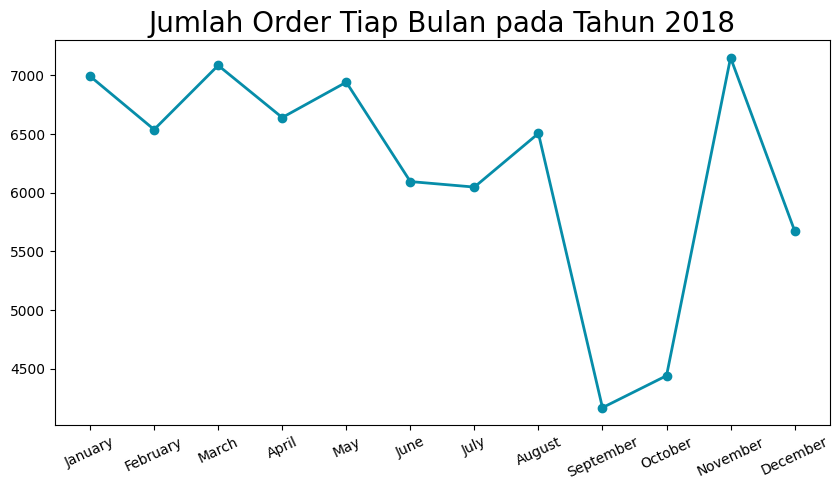

In [59]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_df["order_approved_at"],
    monthly_df["order_id"],
    marker='o',
    linewidth=2,
    color="#068DA9"
)
plt.title("Jumlah Order Tiap Bulan pada Tahun 2018", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

Terlihat pada grafik diatas bahwa terjadi penurunan order yang signifikan pada bulan September dan peningkatan order signifikan pada bulan November.

### Pertanyaan 2 : Pada wilayah mana saja pelanggan paling banyak berada?

#### Berdasarkan customer_state


In [60]:
#Menghitung jumlah customer berdasarkan negara bagian
bystate_df = all_data.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df.head()

,customer_state,customer_count
0,AC,81
1,AL,413
2,AM,148
3,AP,68
4,BA,3380


<ipython-input-61-1e6403349738>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_state',


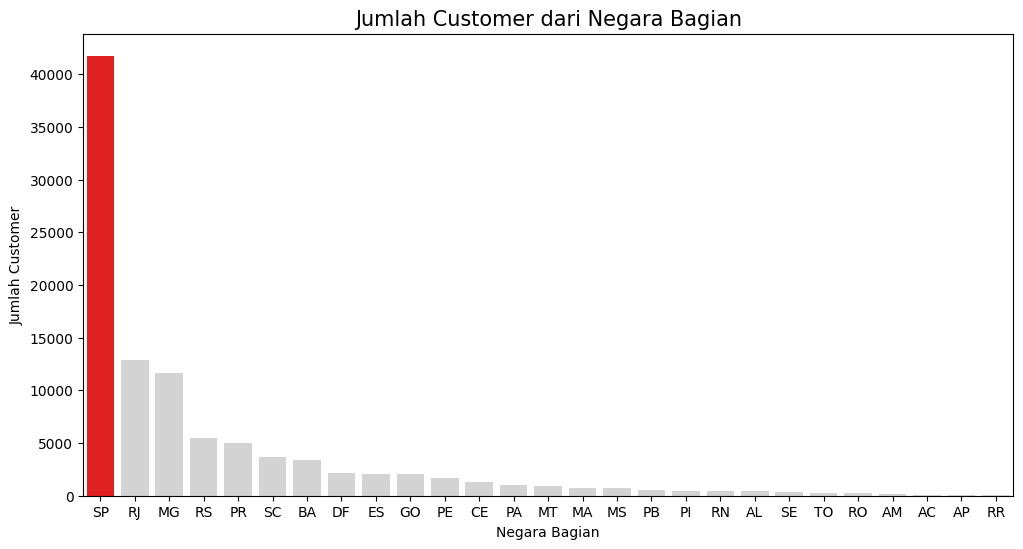

In [61]:
plt.figure(figsize=(12, 6))

most_common_state = bystate_df.loc[bystate_df['customer_count'].idxmax(), 'customer_state']

bystate_df = bystate_df.sort_values(by='customer_count', ascending=False)

sns.barplot(x='customer_state',
            y='customer_count',
            data=bystate_df,
            palette=["#FF0000" if state == most_common_state else "#D3D3D3" for state in bystate_df['customer_state']]
            )

plt.title("Jumlah Customer dari Negara Bagian", fontsize=15)
plt.xlabel("Negara Bagian")
plt.ylabel("Jumlah Customer")
plt.xticks(fontsize=10)
plt.show()

Dari hasil grafik di atas, dapat dilihat bahwa sebagian besar customer berada di Sao Paulo. Perbedaan jumlah customer di Sao Paulo dan wilayah lainnya cukup signifikan.

#### Berdasarkan customer_city

In [62]:
#Menghitung jumlah customer berdasarkan kota
bycity_df = all_data.groupby(by="customer_city").customer_id.nunique().reset_index()
bycity_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bycity_df.head()

,customer_city,customer_count
0,abadia dos dourados,3
1,abadiania,1
2,abaete,12
3,abaetetuba,11
4,abaiara,2


<ipython-input-63-cc16109ffbeb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bycity_df.index,


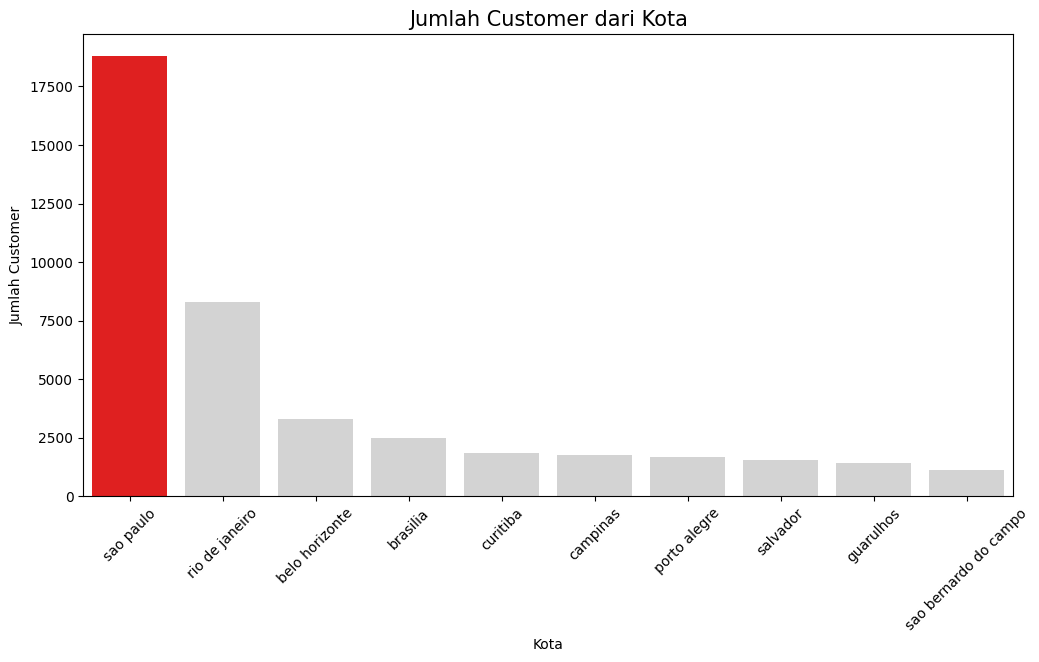

In [63]:
bycity_df = all_data['customer_city'].value_counts().head(10)

plt.figure(figsize=(12, 6))

most_common_city = bycity_df.idxmax()

bycity_df = bycity_df.sort_values(ascending=False)

sns.barplot(x=bycity_df.index,
            y=bycity_df.values,
            palette=["#FF0000" if city == most_common_city else "#D3D3D3" for city in bycity_df.index]
            )

plt.title("Jumlah Customer dari Kota", fontsize=15)
plt.xlabel("Kota")
plt.ylabel("Jumlah Customer")
plt.xticks(rotation=45, fontsize=10)
plt.show()

Begitu pula berdasarkan kota, Sao Paulo memiliki customer terbanyak.

## Conclusion

1) Bagaimana perkembangan performa penjualan di platform e-commerce dari waktu ke waktu?
> Performa e-commerce yang diteliti adalah performa pada tahun 2018. Berdasarkan grafik, jumlah order pada bulan Januari hingga Agustus terlihat cukup stabil dan cenderung menurun walaupun tidak signifikan. Namun, terjadi penurunan besar pada bulan September. Kenaikan pesat terjadi pada bulan November, dimana pada bulan ini terjadi jumlah order tertinggi. Terakhir, terjadi penurunan kembali pada bulan Desember. Perlu diselidiki kembali faktor eksternal apa yang menyebabkan hal ini dapat terjadi.

2) Pada wilayah mana saja pelanggan paling banyak berada?
> Berdasarkan grafik yang telah dihasilkan, São Paulo memiliki jumlah pelanggan atau customer yang jumlahnya berbeda sangat signifikan jika dibandingkan dengan negara bagian atau kota lain. Hal ini mungkin dikarenakan São Paulo adalah kota sekaligus negara bagian yang paling padat di Brazil. Pada urutan ke-2, terdapat Rio de Janeiro yang merupakan kota terpadat ke-2 pula.  